<a href="https://colab.research.google.com/github/EvgenyEsin/Python_libraries_for_DS/blob/main/Python_libraries_for_DS_DZ_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ДЗ к семинару 1

Используя датасет «World Happiness Report 2019», изучите взаимосвязи между различными факторами, которые влияют на уровень счастья в разных странах.

Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

Задание 2: Исследование влияния социальной поддержки на оценку счастья.
Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

Вопросы для обсуждения:
Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? В чем может заключаться причина такой взаимосвязи?

## Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sweetviz as sv
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr, spearmanr, kendalltau

## Загрузка данных

In [3]:
df_happiness  = pd.read_csv('world_happiness_report_2019.csv',  sep=',')
df_happiness.set_index('Overall rank', inplace=True)
df_happiness

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [4]:
df_happiness.dtypes

,0
Country or region,object
Score,float64
GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64


In [5]:
df_happiness.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Score,156.000000,5.407096,1.113120,2.853000,4.544500,5.379500,6.184500,7.769000
GDP per capita,156.000000,0.905147,0.398389,0.000000,0.602750,0.960000,1.232500,1.684000
Social support,156.000000,1.208814,0.299191,0.000000,1.055750,1.271500,1.452500,1.624000
Healthy life expectancy,156.000000,0.725244,0.242124,0.000000,0.547750,0.789000,0.881750,1.141000
Freedom to make life choices,156.000000,0.392571,0.143289,0.000000,0.308000,0.417000,0.507250,0.631000
Generosity,156.000000,0.184846,0.095254,0.000000,0.108750,0.177500,0.248250,0.566000
Perceptions of corruption,156.000000,0.110603,0.094538,0.000000,0.047000,0.085500,0.141250,0.453000


## Корреляционная матрица

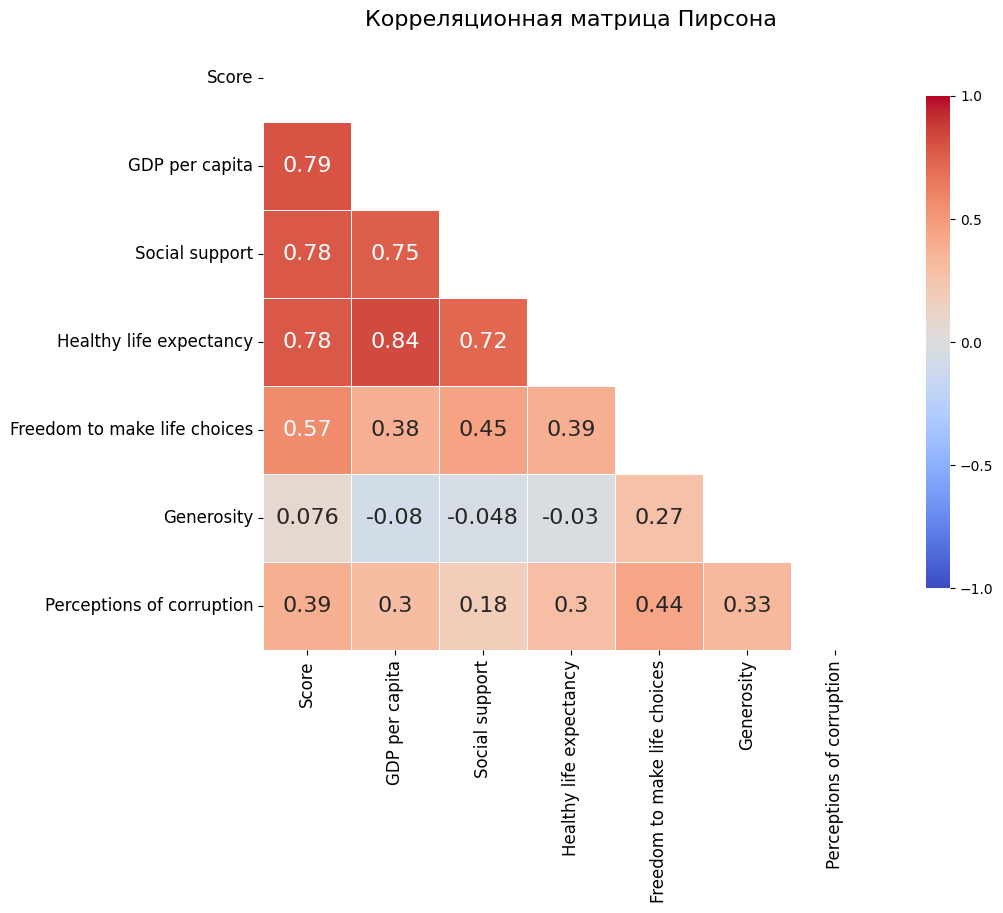

In [6]:
df = df_happiness.drop(columns=['Country or region'])

corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 16},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})

plt.title('Корреляционная матрица Пирсона', size=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



## Задание 1:
Анализ корреляции между ВВП на душу населения и оценкой счастья.

Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.


In [7]:
alpha = 0.05

score = df_happiness['Score']
gdp_per_capita = df_happiness['GDP per capita']
correlation, p_value = pearsonr(score, gdp_per_capita)

if p_value < alpha:
    if correlation > 0.5:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% есть положительная связь между ВВП на душу населения и оценками счастья.')
    elif correlation < 0.5:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% есть отрицательная связь между ВВП на душу населения и оценками счастья.')
    else:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% нет корреляционной связи между ВВП на душу населения  и оценками счастья.')
else:
    print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
    print(f'При уровне значимости 5% нет статистически значимой связи между ВВП на душу населения и оценками счастья.')

print(f'P-значение: {p_value:.4f}')



Коэффициент корреляции Пирсона: 0.794
При уровне значимости 5% есть положительная связь между ВВП на душу населения и оценками счастья.
P-значение: 0.0000


## Задание 2:
Исследование влияния социальной поддержки на оценку счастья.

Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.



In [8]:
alpha = 0.05

score = df_happiness['Score']
social_support = df_happiness['Social support']
correlation, p_value = spearmanr(score, social_support)

if p_value < alpha:
    if correlation > 0.5:
        print(f'Коэффициент корреляции Спирмена: {correlation:.3f}')
        print(f'При уровне значимости 5% есть положительная связь между социальной поддержкой и оценками счастья.')
    elif correlation < 0.5:
        print(f'Коэффициент корреляции Спирмена: {correlation:.3f}')
        print(f'При уровне значимости 5% есть отрицательная связь между социальной поддержкой и оценками счастья.')
    else:
        print(f'Коэффициент корреляции Спирмена: {correlation:.3f}')
        print(f'При уровне значимости 5% нет корреляционной связи между социальной поддержкой и оценками счастья.')
else:
    print(f'Коэффициент корреляции Спирмена: {correlation:.3f}')
    print(f'При уровне значимости 5% нет статистически значимой связи между социальной поддержкой и оценками счастья.')

print(f'P-значение: {p_value:.4f}')


Коэффициент корреляции Спирмена: 0.816
При уровне значимости 5% есть положительная связь между социальной поддержкой и оценками счастья.
P-значение: 0.0000


## Задание 3:
Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.

Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.


In [9]:
alpha = 0.05

score = df_happiness['Score']
healthy_life_expectancy = df_happiness['Healthy life expectancy']
correlation, p_value = kendalltau(score, healthy_life_expectancy)

if p_value < alpha:
    if correlation > 0.5:
        print(f'Коэффициент корреляции Кендалла: {correlation:.3f}')
        print(f'При уровне значимости 5% есть положительная связь между ожидаемой продолжительностью здоровой жизни и оценками счастья.')
    elif correlation < -0.5:
        print(f'Коэффициент корреляции Кендалла: {correlation:.3f}')
        print(f'При уровне значимости 5% есть отрицательная связь между ожидаемой продолжительностью здоровой жизни и оценками счастья.')
    else:
        print(f'Коэффициент корреляции Кендалла: {correlation:.3f}')
        print(f'При уровне значимости 5% нет сильной корреляционной связи между ожидаемой продолжительностью здоровой жизни и оценками счастья.')
else:
    print(f'Коэффициент корреляции Кендалла: {correlation:.3f}')
    print(f'При уровне значимости 5% нет статистически значимой связи между ожидаемой продолжительностью здоровой жизни и оценками счастья.')

print(f'P-значение: {p_value:.4f}')



Коэффициент корреляции Кендалла: 0.603
При уровне значимости 5% есть положительная связь между ожидаемой продолжительностью здоровой жизни и оценками счастья.
P-значение: 0.0000


## Задание 4:
Свобода делать жизненный выбор и уровень счастья.

Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

In [10]:
alpha = 0.05

score = df_happiness['Score']
freedom_to_make_life_choices = df_happiness['Freedom to make life choices']
correlation, p_value = pearsonr(score, freedom_to_make_life_choices)

if p_value < alpha:
    if correlation > 0.5:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% есть положительная связь между свободой делать жизненный выбор и уровнем счастья.')
    elif correlation < 0.5:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% есть отрицательная связь между свободой делать жизненный выбор и уровнем счастья.')
    else:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% нет сильной корреляционной связи между свободой делать жизненный выбор и уровнем счастья')
else:
    print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
    print(f'При уровне значимости 5% нет статистически значимой связи между свободой делать жизненный выбор и уровнем счастья.')

print(f'P-значение: {p_value:.4f}')


Коэффициент корреляции Пирсона: 0.567
При уровне значимости 5% есть положительная связь между свободой делать жизненный выбор и уровнем счастья.
P-значение: 0.0000
